# Problem 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1.2, 3.2, 5.1, 3.5, 2.6])
y = np.array([7.8, 1.2, 6.4, 2.6, 8.1])

In [5]:
# convert to column vectors
x = x.reshape((-1, 1))
y = y.reshape((-1, 1))

In [6]:
def least_squares(x, y, reg=0):
    n, d = x.shape[0], x.shape[1]
    # append x to a column of ones. bias trick
    x = np.hstack((np.ones(n).reshape(-1, 1), x))
    solution = np.linalg.inv(x.T @ x + (reg**2) * np.eye(d + 1)) @ x.T @ y
    return solution

## Part 2a)

In [10]:
regularization_constants = [0, 1, 10]
solutions = []
for i, reg in enumerate(regularization_constants):
    solution = least_squares(x, y, reg)
    print(f"Equation of line when regularization = {reg} is y = {solution[1][0]} * x + {solution[0][0]}")
    solutions.append(solution)

Equation of line when regularization = 0 is y = -0.6766317887394105 * x + 7.331091180866961
Equation of line when regularization = 1 is y = 0.47491248541423553 * x + 3.1152275379229852
Equation of line when regularization = 10 is y = 0.4671668474177275 * x + 0.1791637826693662


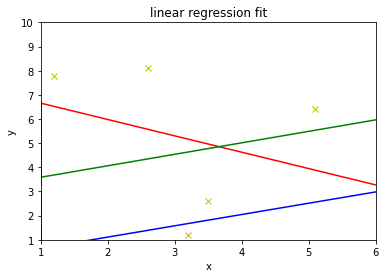

In [13]:
# defining input space
x_new = np.linspace(1, 6, 100).reshape((-1, 1))
n, d = x_new.shape[0], x_new.shape[1]
# append x to a column of ones. bias trick
x_new = np.hstack((np.ones(n).reshape(-1, 1), x_new))

y1 = x_new @ solutions[0]
y2 = x_new @ solutions[1]
y3 = x_new @ solutions[2]

# 3 new plots one each for different regularization
plt.plot(x_new, y1, '-r')
plt.plot(x_new, y2, '-g')
plt.plot(x_new, y3, '-b')

# actual x and y scatter plot
plt.plot(x, y, 'yx')

# defining space for x and y
plt.axis([1, 6, 1, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression fit')
plt.show()

## 2b

The above plot says that when regularization constant is $0$, it is overfitting the data and is giving weight to outliers. This can be seen above in red line. It also says that when regularization constant is $1$, the line fits the data just right. This can be seen above in green line. When regularization constant is $10$, there is too much of regularization. This can be seen above in the blue line.